# <center>Import</center>

In [1]:
from genetic_algorithms import GeneticAlgorithms

# import pandas as pd
import numpy as np
import csv
import time
import pickle
# import copy
import math

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
# Make the graphs a bit prettier, and bigger
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# <center>Function definition</center>

In [2]:
def save_to_pickle_file(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_pickle_file(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
# read solution
def read_solution(filename):
    with open(filename, 'r') as sol_file:
        reader = csv.reader(sol_file, delimiter=' ', skipinitialspace=True)
        cost_sol = []
        
        for row in reader:
            cost_sol.append(int(row[2]))
            
        return cost_sol

## <center>HW 4</center>

In [16]:
def measure_time4(filename, solution_file, generation_num, population_size, print_out=True):
    with open(filename, 'r') as inst_file:
        reader = csv.reader(inst_file, delimiter=' ', skipinitialspace=True)
        
        solution_list = read_solution(solution_file)

        for row, solution in zip(reader, solution_list):
            n = int(row[1])
            M = int(row[2])

            pairs = {}
            for i in range(0, n*2 - 1, 2):
                if int(row[i + 3]) in pairs.keys():
                    # duplication found!
                    if print_out:
                        print(10*'-', 'File:', filename, 'row:', row[0], 'There is a duplicate key!', 10*'-')
                    
                    new_key = int(row[i + 3]) + dupl_counter*dupl_counter_delta
                    
                    dupl_counter += 1
                else:
                    new_key = int(row[i + 3])
                    
                # pair: weight - cost
                pairs[new_key] = int(row[i + 4])

            # define fitness function
            def fitness_func(bin_list, keys):
                cost = 0

                for idx in bin_list:
                    cost += pairs[keys[idx]]

                return abs((solution - cost) / solution)
            
            # run genetic algorithm
            ga = GeneticAlgorithms(list(pairs.keys()), fitness_func, optim='min', elitism=True, 
                                  tournament_size=200, selection='tournament')
#             ga = GeneticAlgorithms(list(pairs.keys()), fitness_func, optim='min', elitism=True, 
#                                   selection='rank')
            
            start_time = time.process_time()
            ga.init_random_population(population_size)
            end_time = time.process_time()
            print('Random initialization:', end_time - start_time)
            
            start_time = time.process_time()
            fitness_progress = ga.run(generation_num)
            end_time = time.process_time()
            print('GA run:', end_time - start_time)
            
            break
            
    return fitness_progress

# <center>Computation</center>

### Define file for saving/loading data

In [4]:
# save or load data to/from this file
result_file4 = 'result4'

## <center>HW 4</center>

### Load previously computed results from a file

In [13]:
# load computed results from the file
dictn4 = load_pickle_file(result_file4)

### Or run a new computation

In [17]:
# n_list = [4,10,15,20,22,25,27,30,32,35,37,40]
n_list = [20]

generation_num = 100
population_size = 1000

file_inst_template = './data/inst/knap_{}.inst.dat'
file_sol_template = './data/sol/knap_{}.sol.dat'
dictn4 = {}
    
for n in n_list:
    dictn4[n] = list(measure_time4(
                     file_inst_template.format(n), file_sol_template.format(n), 
                     generation_num, population_size,
                     print_out=False
                    ))

Random initialization: 0.046875
GA run: 281.046875


In [6]:
dictn4[20][200][-20:]

TypeError: 'float' object is not subscriptable

### Save computed results

In [18]:
save_to_pickle_file(dictn4, result_file4)

# <center>Plots</center>

## <center>Data preparation</center>

### HW 4

In [7]:
# load computed results from the file
dictn4 = load_pickle_file(result_file4)

## <center>Plotting</center>

### HW 4

In [20]:
x = [x for x in range(generation_num + 1)]

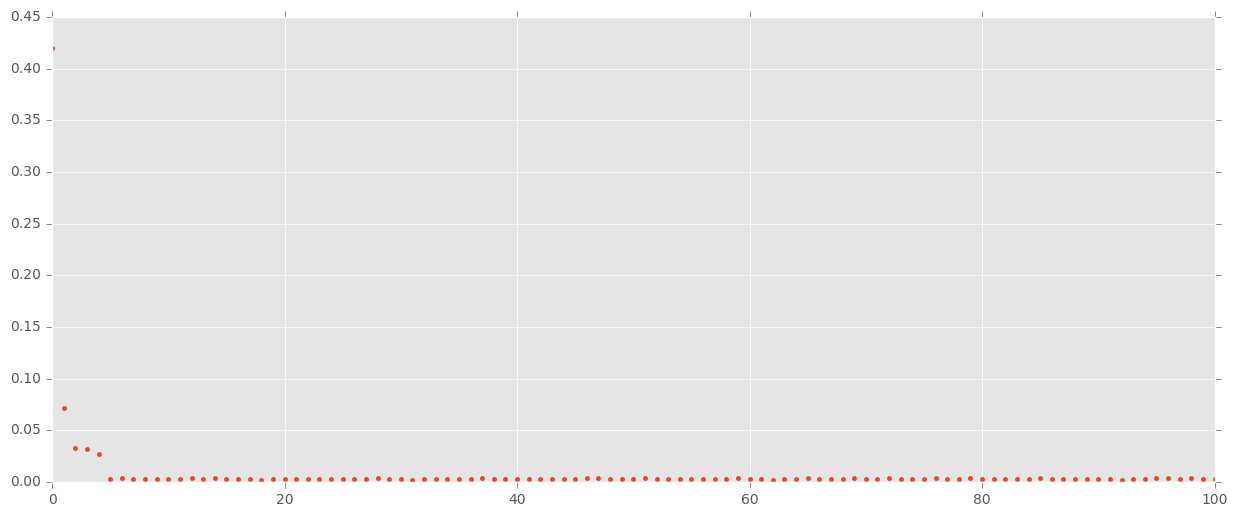

In [22]:
plt.plot(x, dictn4[20], '.')

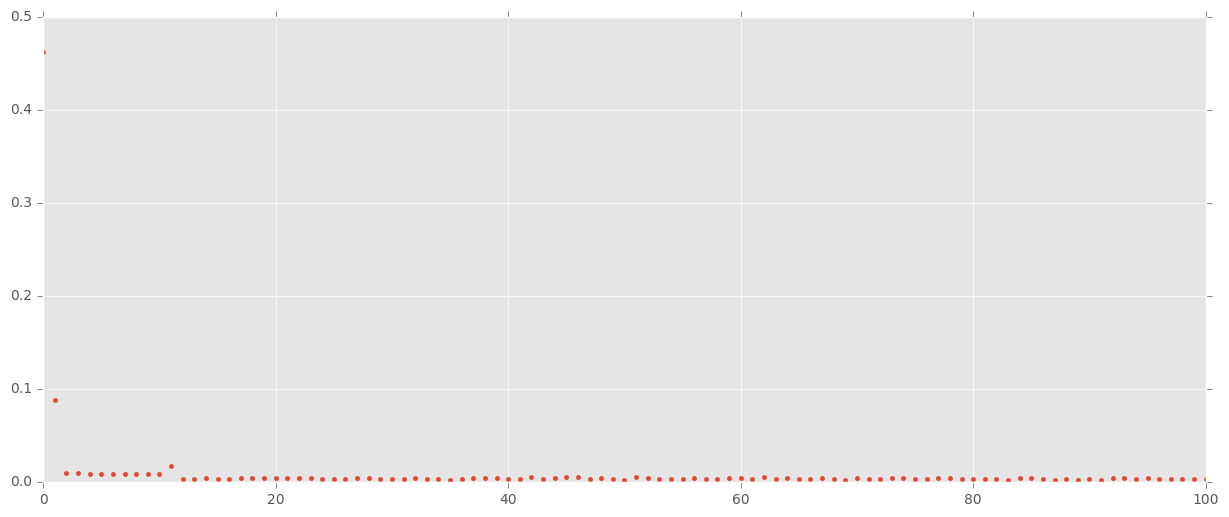

In [12]:
plt.plot(x, dictn4[15], '.')

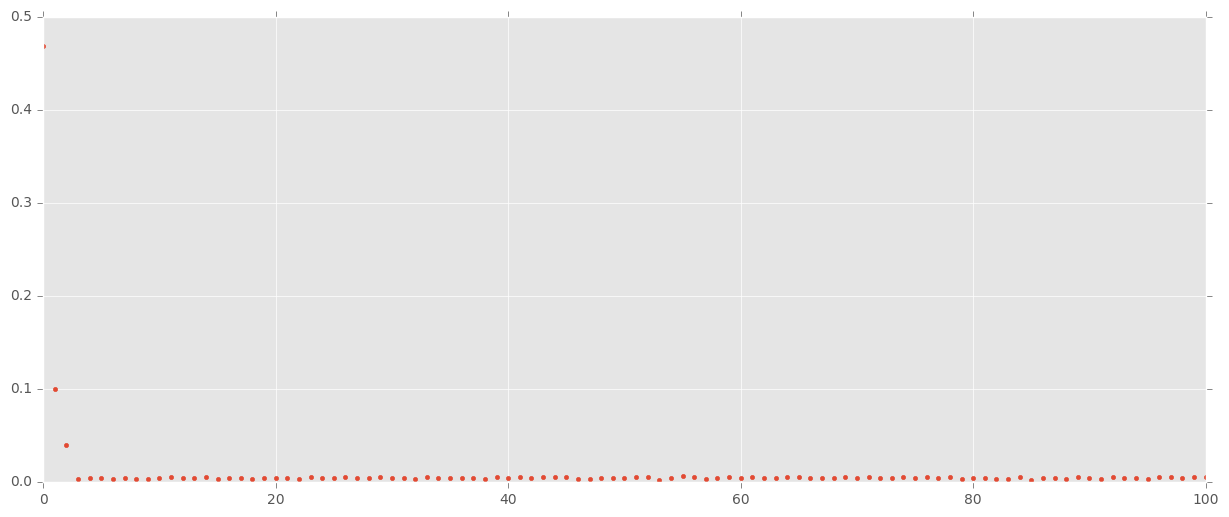

In [15]:
plt.plot(x, dictn4[15], '.')

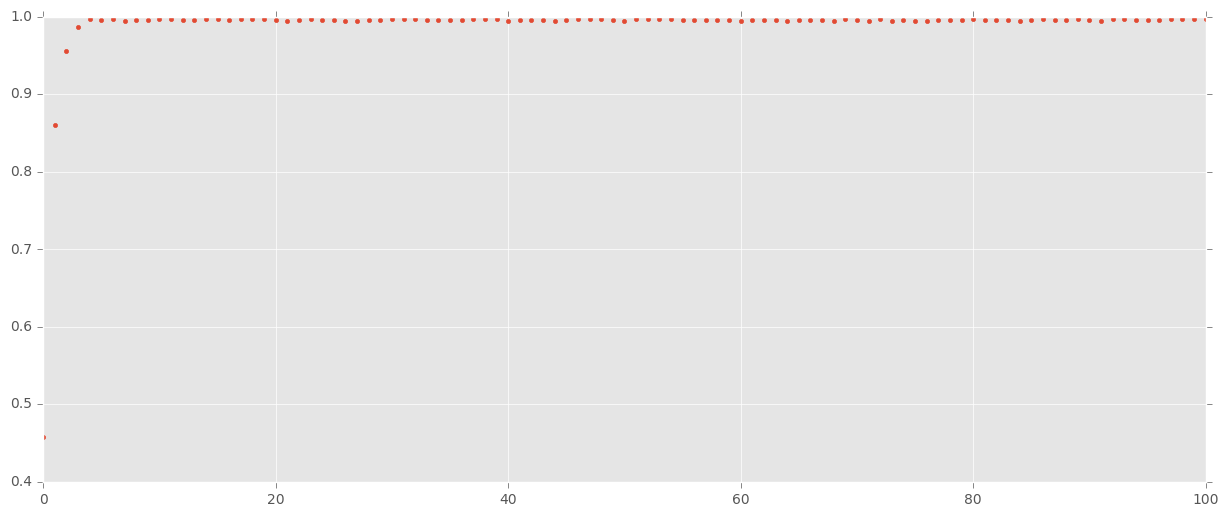

In [8]:
plt.plot(x, dictn4[15], '.')

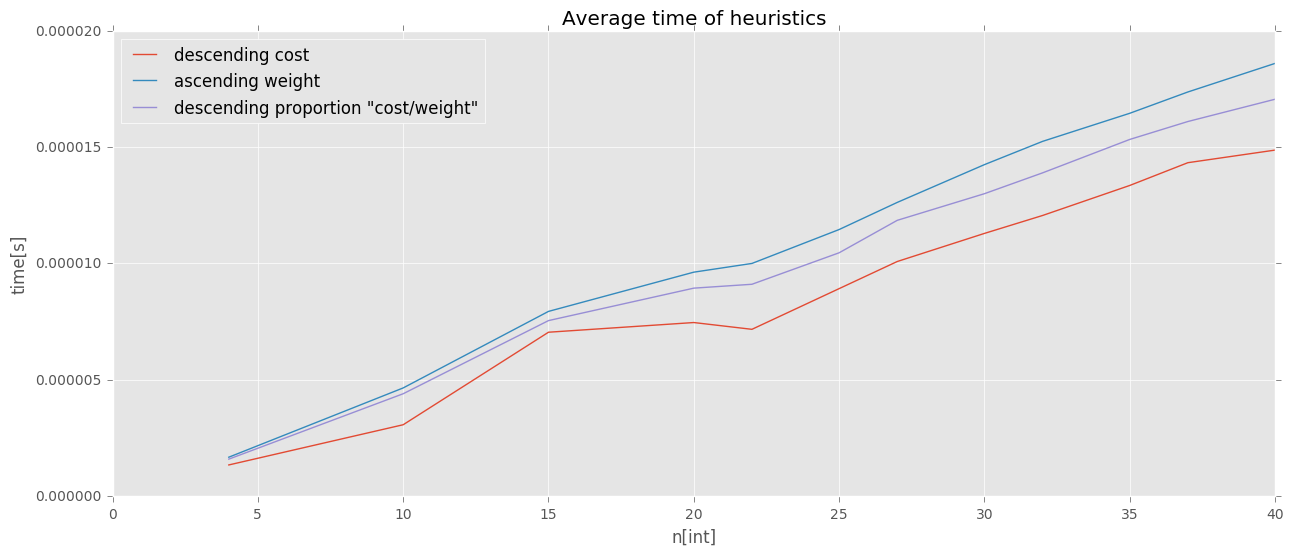

In [9]:
plt.plot(n_list, avg_by_cost_time, label='descending cost')
plt.plot(n_list, avg_by_weight_time, label='ascending weight')
plt.plot(n_list, avg_by_prop_time, label='descending proportion "cost/weight"')
plt.xlabel('n[int]')
plt.ylabel('time[s]')
plt.legend(loc='best')
plt.title('Average time of heuristics')